In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model

In [2]:
X= np.array([1,2,3,4])
N=X.shape[0]
X = np.vstack((np.ones(N), X)).T  #or, we could do :  X.reshape((N,1))  ## then you need to change the code for plots
wGT = np.array([2, 0.1])
y = X@wGT

(0.0, 3.0)

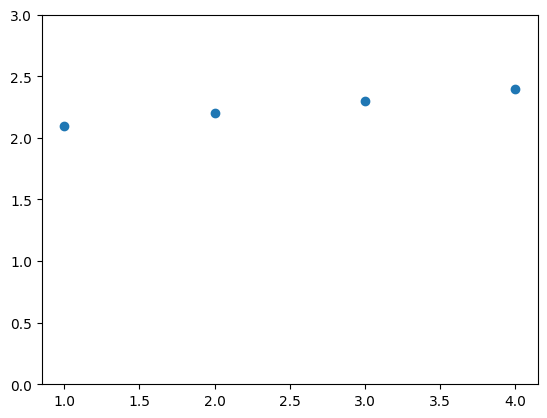

In [3]:
plt.scatter(X[:,1],y)
plt.ylim([0,3])

### Question 1
Plot the Lasso Loss $L(\alpha, w_0, w_1, X, y)$ as a function of the component $w_1$, for $\alpha=0$, $\alpha=1$ and $\alpha=2$. Ignore the bias $b=w_0$ at first, setting it to its true value, so that there is only one parameter to vary, `w[1]`.

What is appearing as you increase $\alpha$ (besides the trivial upward shift of the curve due to adding a large regularization)?

Where is the minimum of the loss ?

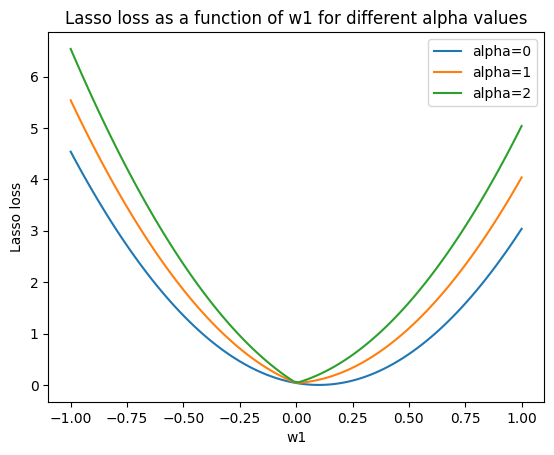

In [5]:
def lasso_loss(w1, alpha, X, y, w0):
    y_pred = w0 + w1 * X[:, 1]
    return np.sum((y - y_pred) ** 2) / (2 * len(y)) + alpha * np.abs(w1)

w0 = wGT[0]

w1_values = np.linspace(-1, 1, 100)

loss_alpha_0 = [lasso_loss(w1, 0, X, y, w0) for w1 in w1_values]
loss_alpha_1 = [lasso_loss(w1, 1, X, y, w0) for w1 in w1_values]
loss_alpha_2 = [lasso_loss(w1, 2, X, y, w0) for w1 in w1_values]

plt.plot(w1_values, loss_alpha_0, label='alpha=0')
plt.plot(w1_values, loss_alpha_1, label='alpha=1')
plt.plot(w1_values, loss_alpha_2, label='alpha=2')
plt.xlabel('w1')
plt.ylabel('Lasso loss')
plt.legend()
plt.title('Lasso loss as a function of w1 for different alpha values')
plt.show()

### Question 2
Plot also the Ridge Loss for $\lambda=1$ and $\lambda=0.01$. Ignore the bias at first, setting it to its true value.

Do you see the same thing appearing ? (besides the trivial upward shift of the curve due to adding a large regularization)

Where is the minimum of the loss ? (answer with words)

### Question 3
Learn the Lasso model, using the method  `sklearn.linear_model.Lasso`, and compare the results using alpha=1 or alpha=0.01.

In [ ]:
#?sklearn.linear_model.Lasso

In [ ]:
lasso1 = sklearn.linear_model.Lasso(??)

In [ ]:
prediction = ??

In [ ]:
plt.scatter(X[:,1],y, label="data", c='k')
plt.plot(X[:,1], prediction, ls="--", label="model, alpha=%.e"%alpha)
plt.ylim([0,3])
plt.legend()

### Note: 
We have augmented the data with the "trick of the ones", but it wasn't needed, because `lasso1.fit_intercept= True` , so we have two bias !
But the lasso method of sklearn does not apply the L1 regul to the bias :)
We could also not augment the data (and reshape it, then), or just use `lasso1.fit_intercept=False` with the augmented X... but what happens then ?

### Question 4:
What is the limit alpha value for which we get a 0 slope (in our model) ?  You can simply try many values of alpha (use a loop !) and answer with an interval (you can narrow the interval by decimation if you like)

### Question 5:
Code your own Lasso algorithm, using numpy (first, do the exercise on the Laplace prior) -- you may need sub-gradients.

-> next TP !